# Bayesianness

Importing the necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Code used to fit a model to data I nicked from a previous bit of work I did.

In [2]:
def Fitting(x, m, c):
    return m*x + c

def Models(X, Y):
    Parameters, Covarience = curve_fit(Fitting, X, Y)
    XModel = np.linspace(min(X), max(X), 100)
    YModel = Fitting(XModel, *Parameters)
    return XModel, YModel, Parameters, Covarience

Creating a random set of numbers normally distributed and inputting it into y. A model is then created for this set of data.

In [3]:
x = np.random.randn(20)
m, c = 2, 3
noise = np.random.randn(20)
y = Fitting(x, m, c + noise)

In [4]:
X, Y, Params, Cov = Models(x, y)
perr = np.sqrt(np.diag(Cov))

In [5]:
print(f'm = {round(Params[0], 3)}, σ(m) = {round(perr[0], 3)}, %σ(m) = {round(perr[0]/Params[0]*100, 3)}%')
print(f'c = {round(Params[1], 3)}, σ(c) = {round(perr[1], 3)}, %σ(c) = {round(perr[1]/Params[1]*100, 3)}%')
print(f'Covarience = {Cov}')

m = 2.197, σ(m) = 0.202, %σ(m) = 9.199%
c = 2.939, σ(c) = 0.238, %σ(c) = 8.095%
Covarience = [[0.04086102 0.00348746]
 [0.00348746 0.05658736]]


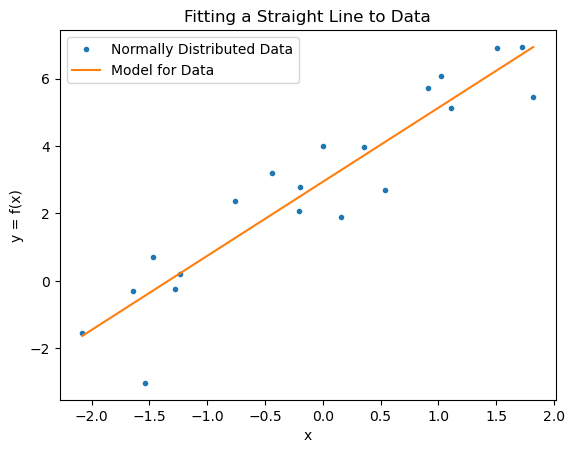

In [6]:
plt.figure()
plt.plot(x, y, '.', label='Normally Distributed Data')
plt.plot(X, Y, label='Model for Data')
plt.title('Fitting a Straight Line to Data')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.show()